## Necessray Modules Imports

Running PlaidML as a backend of KERAS for non-Nvidia GPUs 

In [ ]:
# Importing PlaidML. Make sure you follow this order
import plaidml.keras
plaidml.keras.install_backend()
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

## Dataset Import and Enocding

*   ***0*** means ***Benign***
*   ***1*** means ***Malignant***

In [ ]:
import glob
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Benign = glob.glob('/Users/needapsychiatrist/Documents/Fiverr Clients/elkhalefdoha - Image Classification DL/Dataset of Mammography with Benign Malignant Breast Masses/INbreast+MIAS+DDSM Dataset/Benign Masses/*.*')
Malignant = glob.glob('/Users/needapsychiatrist/Documents/Fiverr Clients/elkhalefdoha - Image Classification DL/Dataset of Mammography with Benign Malignant Breast Masses/INbreast+MIAS+DDSM Dataset/Malignant Masses/*.*')

data = []
labels = []

count = 0

for i in Benign:   
    image=keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (227, 227))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    print("Benign: " + str(count))
    count += 1

benignCase = len(data)

count = 0

for i in Malignant:   
    image=keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (227, 227))
    image=np.array(image)
    data.append(image)
    labels.append(1)
    print("Malignant: " + str(count))
    count += 1
    
malignantCase = len(data) - benignCase

data = np.array(data)
labels = np.array(labels)
print("\n\nData Insertion Successful!")

Benign: 0
Benign: 1
Benign: 2
Benign: 3
Benign: 4
Benign: 5
Benign: 6
Benign: 7
Benign: 8
Benign: 9
Benign: 10
Benign: 11
Benign: 12
Benign: 13
Benign: 14
Benign: 15
Benign: 16
Benign: 17
Benign: 18
Benign: 19
Benign: 20
Benign: 21
Benign: 22
Benign: 23
Benign: 24
Benign: 25
Benign: 26
Benign: 27
Benign: 28
Benign: 29
Benign: 30
Benign: 31
Benign: 32
Benign: 33
Benign: 34
Benign: 35
Benign: 36
Benign: 37
Benign: 38
Benign: 39
Benign: 40
Benign: 41
Benign: 42
Benign: 43
Benign: 44
Benign: 45
Benign: 46
Benign: 47
Benign: 48
Benign: 49
Benign: 50
Benign: 51
Benign: 52
Benign: 53
Benign: 54
Benign: 55
Benign: 56
Benign: 57
Benign: 58
Benign: 59
Benign: 60
Benign: 61
Benign: 62
Benign: 63
Benign: 64
Benign: 65
Benign: 66
Benign: 67
Benign: 68
Benign: 69
Benign: 70
Benign: 71
Benign: 72
Benign: 73
Benign: 74
Benign: 75
Benign: 76
Benign: 77
Benign: 78
Benign: 79
Benign: 80
Benign: 81
Benign: 82
Benign: 83
Benign: 84
Benign: 85
Benign: 86
Benign: 87
Benign: 88
Benign: 89
Benign: 90
Benign: 9

## Dataset Description & Visualization

The dataset contains total 24574 images of mass mammography

1.   10865 out of them are marked as BENIGN
2.   13709 out of them are marked as MALIGNANT

In [ ]:
print('Number of benign images found: ' + str(benignCase - 1))
print('Number of malignant images found: ' + str(malignantCase - 1))
print('\n\nTotal images found: ' + str(benignCase + malignantCase - 2))

Number of benign images found: 10865
Number of malignant images found: 13709


Total images found: 24574


Bar Plot depicts the number of images in the cases of ***benign*** and ***malignant***

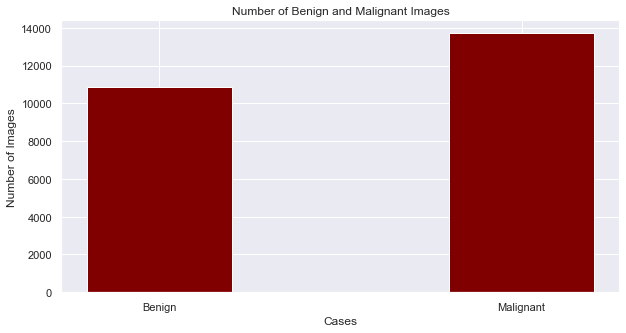

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Benign': 10865, 'Malignant': 13709}
cases = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(cases, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Cases")
plt.ylabel("Number of Images")
plt.title("Number of Benign and Malignant Images")
plt.show()

Dataset images with corresponding cases

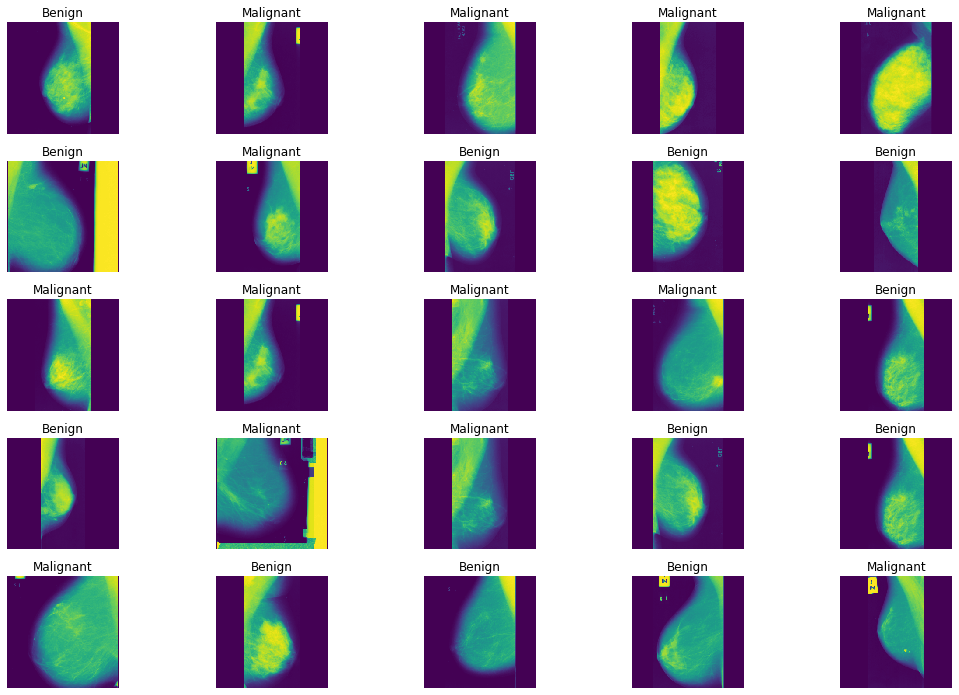

In [ ]:
import matplotlib.pyplot as plt
import random # for visualization

# view image random images
def view_25_random_image():
    fig = plt.figure(figsize = (15, 10))
    for i in range(25):
        rand = random.randint(0,len(label))
        ax = plt.subplot(5, 5, i+1)
    
        img = cv2.imread(img_name[rand], 0)
        if img is None:
            print('Wrong path:', path)
        else:
            img = cv2.resize(img, (256,256))
            if label[rand] == 1:
                plt.title('Benign')
            else:
                plt.title('Malignant')
            plt.tight_layout()
            plt.axis('off')
            plt.imshow(img)
        fig.savefig('random_25_image_fig.png')

random_images = view_25_random_image()

## Train Test Split

Train-Test was splitted in 80-20 ratio with random state being 42:
*   Training Samples: 19660
*   Test Samples: 4916


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

Data Normalization

In [ ]:
x_train = x_train[:, :, :, 0]
x_test = x_test[:, :, :, 0]

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print('Training Sample Size: ' + str(x_train.shape[0]))
print('Test Sample Size: ' + str(x_test.shape[0]))

Training Sample Size: 19660
Test Sample Size: 4916


## CNN (Convolutional Neural Network)

*   Accuracy: 0.9708
*   Loss: 0.0833


In [ ]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(227, 227, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=20)

test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/20
19660/19660 [==============================] - 8s 426us/step - loss: 0.6294 - acc: 0.7690
Epoch 2/20
19660/19660 [==============================] - 4s 186us/step - loss: 0.4055 - acc: 0.8521
Epoch 3/20
19660/19660 [==============================] - 4s 187us/step - loss: 0.3487 - acc: 0.8743
Epoch 4/20
19660/19660 [==============================] - 4s 185us/step - loss: 0.3136 - acc: 0.8855
Epoch 5/20
19660/19660 [==============================] - 4s 184us/step - loss: 0.2869 - acc: 0.8934
Epoch 6/20
19660/19660 [==============================] - 4s 185us/step - loss: 0.2693 - acc: 0.9021
Epoch 7/20
19660/19660 [==============================] - 4s 183us/step - loss: 0.2431 - acc: 0.9110
Epoch 8/20
19660/19660 [==============================] - 4s 185us/step - loss: 0.2247 - acc: 0.9173
Epoch 9/20
19660/19660 [==============================] - 4s 184us/step - loss: 0.2073 - acc: 0.9245
Epoch 10/20
19660/19660 [==============================] - 4s 185us/step - loss: 0.1912 - a

Saving CNN Model to disk

In [1]:
model.save("/Users/needapsychiatrist/Documents/Fiverr Clients/elkhalefdoha - Image Classification DL/CNN.h5")
print("Saved model to disk . . .")

Saved model to disk . . .


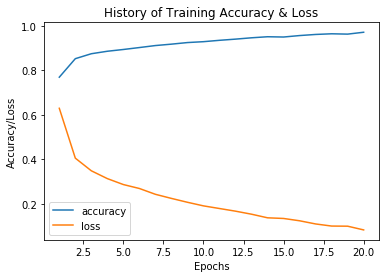

In [ ]:
import matplotlib.pyplot as plt

def Train_Val_Plot(acc, loss):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(loss) + 1), loss)
    ax1.set_title('History of Training Accuracy & Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy/Loss')
    ax1.legend(['accuracy', 'loss'])  

Train_Val_Plot(history.history['acc'],history.history['loss'])

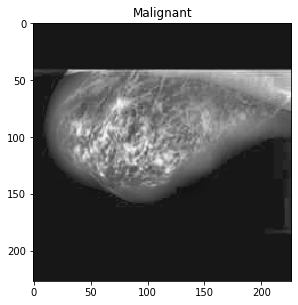

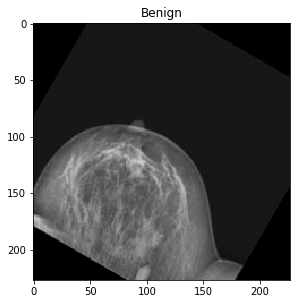

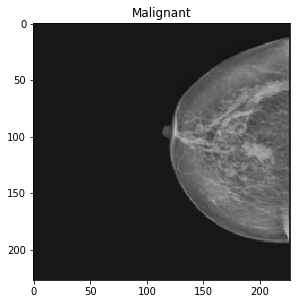

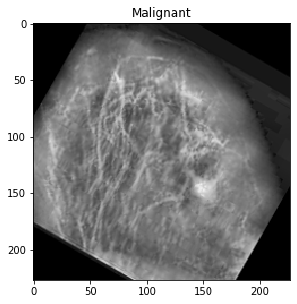

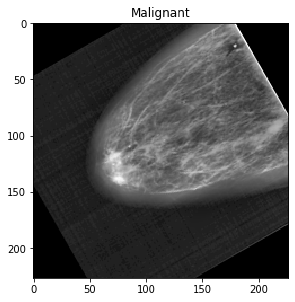

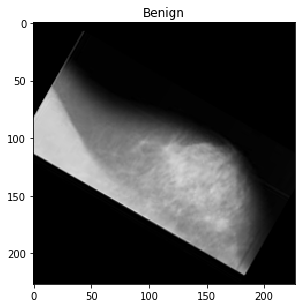

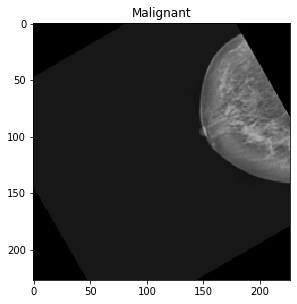

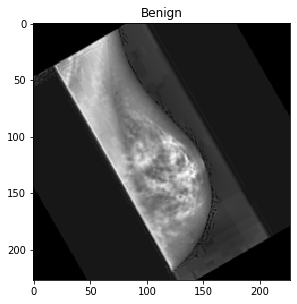

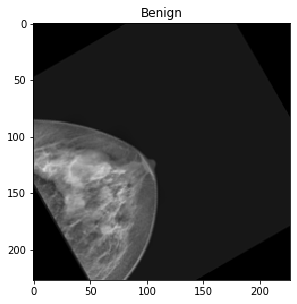

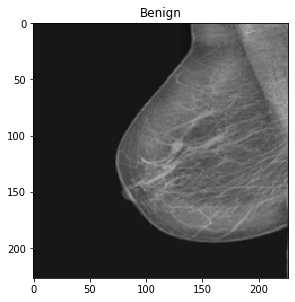

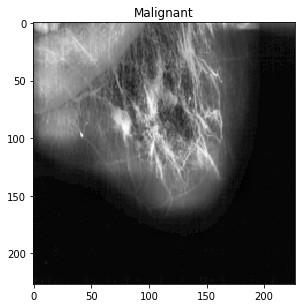

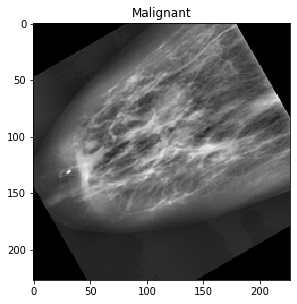

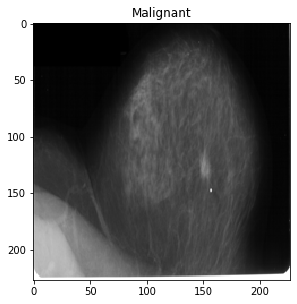

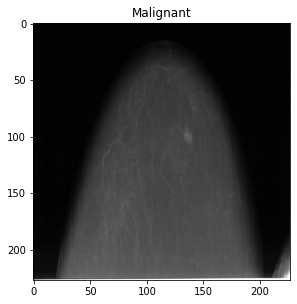

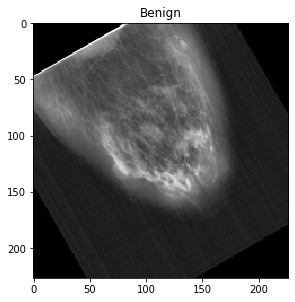

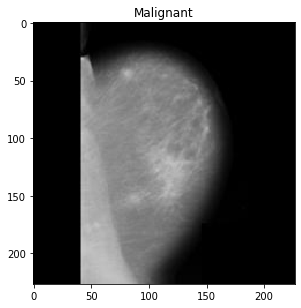

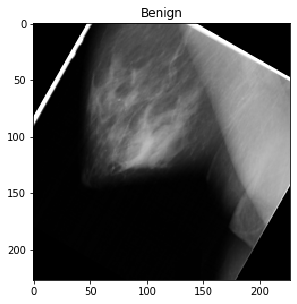

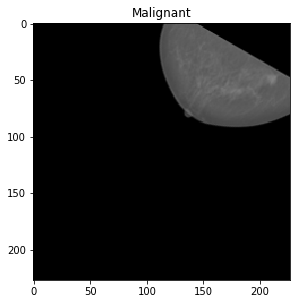

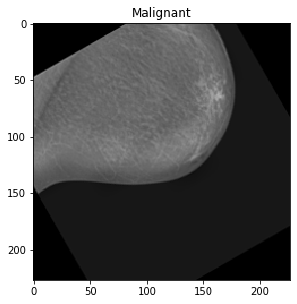

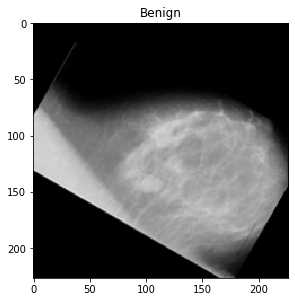

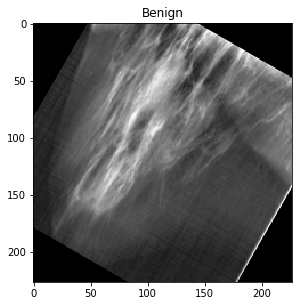

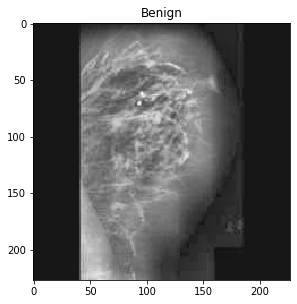

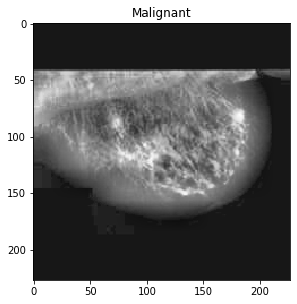

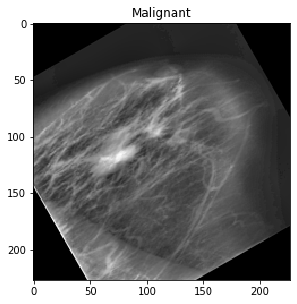

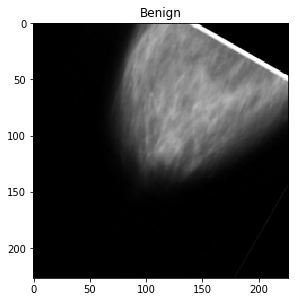

In [ ]:
# for visualization
import random

for i in range(25):
    fig = plt.figure(figsize = (20, 20))
    rand = random.randint(500, 1500)
    ax = plt.subplot(5, 5, i+1)
    
    if y_test[rand] == 0:
        plt.title('Benign')
    else:
        plt.title('Malignant')
    plt.tight_layout()
    plt.axis('on')
    plt.imshow(x_test[rand], cmap = plt.cm.binary)
    plt.show()

## ANN (Artificial Neural Network)

*   Accuracy: 0.9454
*   Loss: 0.1428



In [ ]:
ANN = Sequential()
ANN.add(Dense(input_dim = x_train.shape[1], units = 256, kernel_initializer='uniform', activation='relu'))
ANN.add(Dense(units = 1, kernel_initializer='uniform', activation='softmax'))

ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ANN.fit(X_train, y_train, epochs=25, verbose=2)

Epoch 1/25
 - 9s - loss: 0.4975 - acc: 0.8236
Epoch 2/25
 - 9s - loss: 0.3668 - acc: 0.8658
Epoch 3/25
 - 9s - loss: 0.3301 - acc: 0.8794
Epoch 4/25
 - 10s - loss: 0.3067 - acc: 0.8873
Epoch 5/25
 - 10s - loss: 0.2870 - acc: 0.8933
Epoch 6/25
 - 10s - loss: 0.2733 - acc: 0.8993
Epoch 7/25
 - 10s - loss: 0.2599 - acc: 0.9035
Epoch 8/25
 - 10s - loss: 0.2506 - acc: 0.9053
Epoch 9/25
 - 9s - loss: 0.2381 - acc: 0.9106
Epoch 10/25
 - 9s - loss: 0.2280 - acc: 0.9137
Epoch 11/25
 - 9s - loss: 0.2214 - acc: 0.9150
Epoch 12/25
 - 9s - loss: 0.2124 - acc: 0.9206
Epoch 13/25
 - 9s - loss: 0.2050 - acc: 0.9228
Epoch 14/25
 - 9s - loss: 0.1985 - acc: 0.9263
Epoch 15/25
 - 10s - loss: 0.1929 - acc: 0.9283
Epoch 16/25
 - 9s - loss: 0.1847 - acc: 0.9302
Epoch 17/25
 - 9s - loss: 0.1807 - acc: 0.9319
Epoch 18/25
 - 9s - loss: 0.1758 - acc: 0.9329
Epoch 19/25
 - 9s - loss: 0.1682 - acc: 0.9373
Epoch 20/25
 - 9s - loss: 0.1626 - acc: 0.9385
Epoch 21/25
 - 9s - loss: 0.1622 - acc: 0.9386
Epoch 22/25
 - 9

Saving ANN Model to disk

In [2]:
ANN.save("/Users/needapsychiatrist/Documents/Fiverr Clients/elkhalefdoha - Image Classification DL/ANN.h5")
print("Saved model to disk . . .")

Saved model to disk . . .


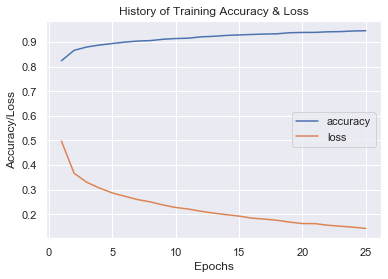

In [ ]:
import matplotlib.pyplot as plt
def Train_Val_Plot(acc, loss):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(loss) + 1), loss)
    ax1.set_title('History of Training Accuracy & Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy/Loss')
    ax1.legend(['accuracy', 'loss'])  

Train_Val_Plot(history.history['acc'],history.history['loss'])

## LSTM (Long Short Term Memory)

*   Accuracy: 0.9893
*   Loss: 0.0397

In [ ]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='softmax'))
opt = keras.optimizers.Adam(lr=1e-3, decay=1e-5)

model.compile(loss='binary_crossentropy', optimizer=opt,
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, verbose=2)

Epoch 1/10
 - 118s - loss: 0.7895 - acc: 0.7365
Epoch 2/10
 - 126s - loss: 0.2012 - acc: 0.9445
Epoch 3/10
 - 123s - loss: 0.1332 - acc: 0.9640
Epoch 4/10
 - 125s - loss: 0.0994 - acc: 0.9731
Epoch 5/10
 - 129s - loss: 0.0817 - acc: 0.9785
Epoch 6/10
 - 127s - loss: 0.0667 - acc: 0.9820
Epoch 7/10
 - 130s - loss: 0.0567 - acc: 0.9846
Epoch 8/10
 - 135s - loss: 0.0516 - acc: 0.9867
Epoch 9/10
 - 160s - loss: 0.0436 - acc: 0.9882
Epoch 10/10
 - 158s - loss: 0.0397 - acc: 0.9893


Saving LSTM Model to disk

In [3]:
model.save("/Users/needapsychiatrist/Documents/Fiverr Clients/elkhalefdoha - Image Classification DL/LSTM.h5")
print("Saved model to disk . . .")

Saved model to disk . . .


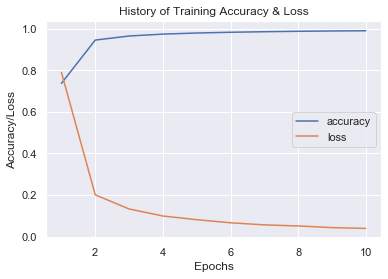

In [ ]:
import matplotlib.pyplot as plt
def Train_Val_Plot(acc, loss):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(loss) + 1), loss)
    ax1.set_title('History of Training Accuracy & Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy/Loss')
    ax1.legend(['accuracy', 'loss'])  

Train_Val_Plot(history.history['acc'],history.history['loss'])

## Comparative Result Analysis (Accuracy)

LSTM performed best in comparison with CNN and ANN


> Higher is better



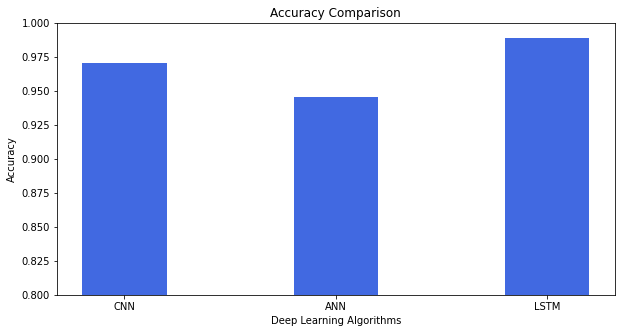

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
data = {'CNN': 0.9708, 'ANN': 0.9454, 'LSTM': 0.9893}
models = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, accuracy, color='royalblue', width=0.4)

plt.ylim(0.8, 1)
plt.xlabel("Deep Learning Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.show()

## Comparative Result Analysis (Loss)

LSTM performed best in comparison with CNN and ANN

> Lower is better



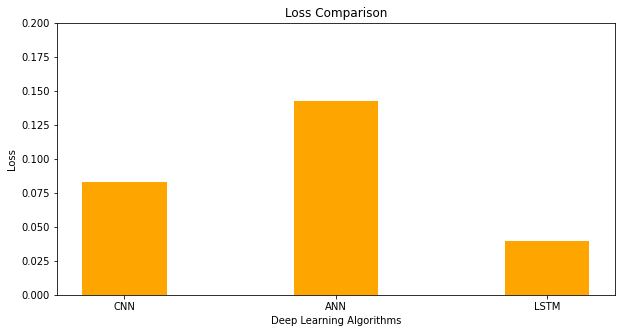

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
data = {'CNN': 0.0833, 'ANN': 0.1428, 'LSTM': 0.0397}
models = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, accuracy, color ='orange',
        width = 0.4)

plt.ylim(0, 0.2)
plt.xlabel("Deep Learning Algorithms")
plt.ylabel("Loss")
plt.title("Loss Comparison")
plt.show()

## Comparative Result Analysis (Precision)



LSTM performed best in comparison with CNN and ANN


> Higher is better



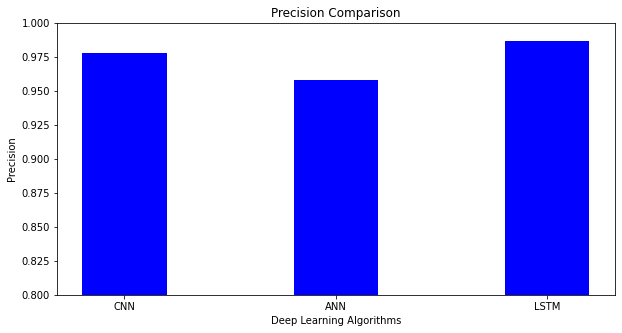

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
data = {'CNN': cnnPrecision, 'ANN': annPrecision, 'LSTM': lstmPrecision}
models = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, accuracy, color ='blue',
        width = 0.4)

plt.ylim(0.8, 1)
plt.xlabel("Deep Learning Algorithms")
plt.ylabel("Precision")
plt.title("Precision Comparison")
plt.show()

## Comparative Result Analysis (Recall)

LSTM performed best in comparison with CNN and ANN


> Higher is better



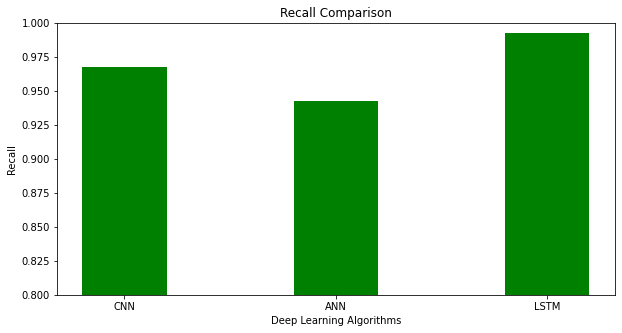

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
data = {'CNN': cnnRecall, 'ANN': annRecall, 'LSTM': lstmRecall}
models = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, accuracy, color ='green',
        width = 0.4)

plt.ylim(0.8, 1)
plt.xlabel("Deep Learning Algorithms")
plt.ylabel("Recall")
plt.title("Recall Comparison")
plt.show()

## Comparative Result Analysis (F1-Measure)

LSTM performed best in comparison with CNN and ANN


> Higher is better



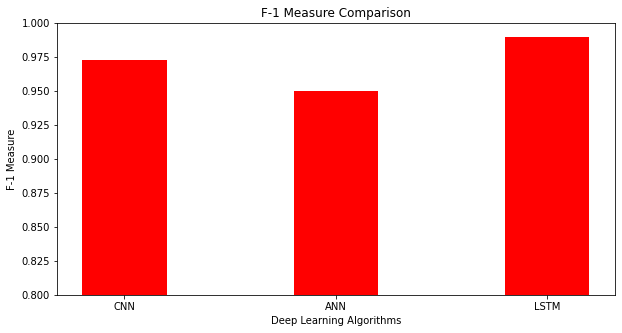

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
data = {'CNN': cnnFmeasure, 'ANN': annFmeasure, 'LSTM': lstmFmeasure}
models = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(models, accuracy, color ='red',
        width = 0.4)

plt.ylim(0.8, 1)
plt.xlabel("Deep Learning Algorithms")
plt.ylabel("F-1 Measure")
plt.title("F-1 Measure Comparison")
plt.show()